# **Importing Libraries and Initialization of Color Set**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Blue = '#2CBDFE'
Green = '#47DBCD'
Purple = '#7168d7'
Violet = '#661D98'
Amber = '#FD7E14'
Yellow = '#F0FC08'
Pink = '#FC0886'
gr = '#05BF02'

# **Data Reading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# df_final = pd.read_excel('/content/drive/My Drive/Merged_Final.xlsx') # Zara Drive Path
df_final = pd.read_excel('/content/drive/MyDrive/Term1/Special Topics on Software Engineering/Project/Final Trimmed Dataset/Updated Latest Database/Merged_Final.xlsx') # Manan Drive Path

df_final

,Unnamed: 0,QuestionID,QuestionUserID,QuestionTags,QuestionBody,AnswerID,AnswerUserID,AnswerBody,CommentText,CommentID,CommentUserID,CommentDate,ByWho,Keywords,ObsoleteType,LegacyOrInvalid,WhatTool,ProvideSolution,HowToSupport
0,0,15415571,2152677,php|mysql|ajax|drop-down-menu,<p>Can some one tell me what's wrong with this...,15415824,2076598,<pre><code>//Index.php &lt;?php $conn = mysql_...,You are using [an **obsolete** database API](h...,21797823,19068,2013-03-14 17:08:54.613 UTC,outsider,obsolete,ext,invalid,NaN,yes,link/updated/other
1,1,14589937,1833487,php|mysql|rounding,<p>how to round figure mysql result value</p> ...,14589998,1453561,<pre><code>&lt;td width='20%'&gt; .round($earn...,"[**Please, don't use `mysql_*` functions in ne...",20365761,679449,2013-01-29 18:42:37.7 UTC,outsider,deprecated,ext,invalid,NaN,yes,link/updated
2,3,14001289,1923251,python|dictionary,<pre><code>while (lines &lt; travels + 1): dat...,14001306,1504837,<p>You reset the <code>capacity</code> to a em...,`capacity = {}` is the culprit. Also don't use...,19328342,846892,2012-12-22 08:37:12.66 UTC,outsider,deprecated,lang,legacy,NaN,yes,updated
3,6,20008385,1162128,php|mysql|md5,<p>i'm getting back to make some php code to m...,20008461,2919798,<p>Hope it helps you <code>$num = mysql_num_ro...,There is **no more support** for `mysql_*` fun...,29792186,1680836,2013-11-15 18:51:49.82 UTC,outsider,deprecated,ext,invalid,NaN,yes,updated/version
4,8,25878912,2188525,django,<p>I am trying to get on Django 1.7 and follow...,29351158,544059,<p>As mentioned in <a href= http://stackoverfl...,"As mentioned in the accepted answer, I narrowe...",48179112,2188525,2015-05-04 13:30:47.607 UTC,asker,old,ext,legacy,NaN,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,708,19005895,1775700,php|mysql|math|if-statement|sum,<p>I need to make some math and I cannot seem ...,19006387,2655799,<p>you can try to change a little bit your sql...,Please don't use any mysq_* functions as they ...,28079019,446594,2013-09-25 13:22:19.737 UTC,outsider,deprecated,lang,invalid,NaN,Yes,link/updated
294,712,16843431,1535011,php|mysql|parameters,<p>I know that THERE ARE MANY questions about ...,16843652,1713079,<p>When passed an UPDATE query <code>mysql_que...,Consider using the PDO library instead of the ...,24288358,352765,2013-05-30 18:35:46.6 UTC,outsider,deprecated,lang,legacy,NaN,Yes,updated
295,717,32048404,5234871,c#|php|sql,<p>I'm writing a php script. I need client-ser...,32048463,2735598,<p>Change your code from </p> <pre><code>$quer...,"Please dont use mysql_* functions, they are de...",51996398,3435158,2015-08-17 10:46:07.753 UTC,outsider,deprecated,lang,invalid,NaN,Yes,updated
296,719,27420559,4304993,python|xcode|python-imaging-library|failed-ins...,<p>After installing xcode I executed <code>pip...,27459308,724176,<p>Did you uninstall PIL first? </p> <p>Try:</...,PIL is deprecated; you should use the replacem...,43283935,4014959,2014-12-11 10:32:53.203 UTC,outsider,deprecated,lang/ext,invalid,NaN,Yes,link/updated


In [ ]:
df_rq4 = pd.read_csv('/content/drive/MyDrive/Term1/Special Topics on Software Engineering/Project/Final Trimmed Dataset/Qualitative Data Master New.csv')
df_rq4

,Unnamed: 0,QuestionID,QuestionUserID,QuestionTags,QuestionBody,AnswerID,AnswerUserID,AnswerBody,CommentText,CommentID,CommentUserID,CommentDate,ByWho,Keywords
0,0,23014685,950506,python|string,<p>I am trying to mutate a string of bits with...,23015933,2011147,<p>After the deleted answer here is a working ...,"sorry, I copied in old var names",35154732,950506,2014-04-11 13:59:14.723 UTC,asker,old
1,1,26104637,3820586,sql|database,<p>Sorry asking such a newbie question but I'v...,26104732,54555,<p>Just add another join like this:</p> <pre><...,You shouldn't suddenly mix the *proper* ANSI J...,40909096,13302,2014-09-29 16:35:22.063 UTC,outsider,deprecated
2,2,28367723,1955292,python|jinja2,<p>hello I want to set the value of an item in...,28367924,1516286,<p>You can do it like this:</p> <pre><code>In ...,Jinja intentionally makes it hard to modify da...,45076700,567620,2015-02-06 14:26:16.017 UTC,outsider,old
3,3,24527828,2614106,sql|sql-server|sql-server-2008|database-design...,<p>Workszenario:</p> <p>I have a database fill...,24529136,1407421,<p>You can use Partition table for your idea. ...,"No, i dont have multiple disks. Then i propabl...",38406683,2614106,2014-07-15 09:27:05.58 UTC,asker,old
4,4,24527828,2614106,sql|sql-server|sql-server-2008|database-design...,<p>Workszenario:</p> <p>I have a database fill...,24529136,1407421,<p>You can use Partition table for your idea. ...,"Usually you would keep all data in one table, ...",37980090,2270762,2014-07-02 10:09:06.59 UTC,outsider,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,12666,12440210,1480764,php|mysql|database,<p>I'm calling from a database the information...,12440235,558021,<p>What you want to do is push all of the resu...,please note: the `mysql_xx()` functions are co...,16727615,352765,2012-09-15 19:17:54.053 UTC,outsider,obsolete
12334,12667,36623179,1993254,php|mysql|database,<p>How do i check the value of a database entr...,36624029,6167295,<p>I did not check the following <code>class</...,Please dont use [the `mysql_` database extensi...,60842440,2310830,2016-04-14 12:36:33.39 UTC,outsider,deprecated
12335,12668,13386696,1756209,php|mysql|database,<p>I'dont understand this:</p> <p>I will updat...,13386724,1315962,<p>DESC is a reserved word in SQL. You'll need...,Please don't use the mysql_* API anymore. It i...,18283563,11995,2012-11-14 20:24:40.7 UTC,outsider,deprecated
12336,12669,27720334,4402797,php|mysql|database,<p>this is PHP code:</p> <pre><code>&lt;?php /...,27720558,4402797,<p>tanks to <strong>gaurav kumar</strong> this...,`mysql` is deprecated,43852365,2500658,2014-12-31 11:21:57.88 UTC,outsider,deprecated


# **Drawing Graph**

In [ ]:
def DrawGraph(dataframe, xlabel, ylabel, legend):
    color_list = [Blue, Purple, Amber, Yellow, gr, Violet, Pink]
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
    ax = dataframe.plot(kind='bar', figsize=(12, 7), fontsize=12)
    plt.xlabel(xlabel, fontsize=13, labelpad=10)
    plt.ylabel(ylabel, fontsize=13)
    plt.legend(legend, fontsize=12)
    for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      ax.text(x + width / 2, height + 5, '{:.0f}'.format(height), fontsize=13, fontweight='bold',
              horizontalalignment='center', verticalalignment='center')
    plt.show()

In [ ]:
def DrawStackGraph(dataframe, sum_col, xlabel, ylabel):
  color_list = [Purple, Amber, Blue]
  plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
  ax = dataframe.plot(kind='bar', figsize=(15, 8), fontsize=13, stacked=True)
  plt.xticks(rotation=0)
  plt.xlabel(xlabel, fontsize=13, labelpad=10)
  plt.ylabel(ylabel, fontsize=13)
  plt.legend(dataframe.columns, fontsize=12)

  row_size = int(dataframe.size/dataframe.columns.size)
  hh = []
  for i in range(row_size):
    hh.append(0)
  c = 0
  r = 0
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      hh[c] += height
      if r > dataframe.columns.size-2:
          ax.text(x + width / 2, hh[c]+5, '{:.0f}, ({:.1f}%)'.format(hh[c], (hh[c]/sum_col)*100), fontweight='bold',
                      horizontalalignment='center', verticalalignment='center')
      c += 1
      if c >= row_size:
          c = 0
          r += 1
  plt.show()

**Number of obsolete questions asked by each user**

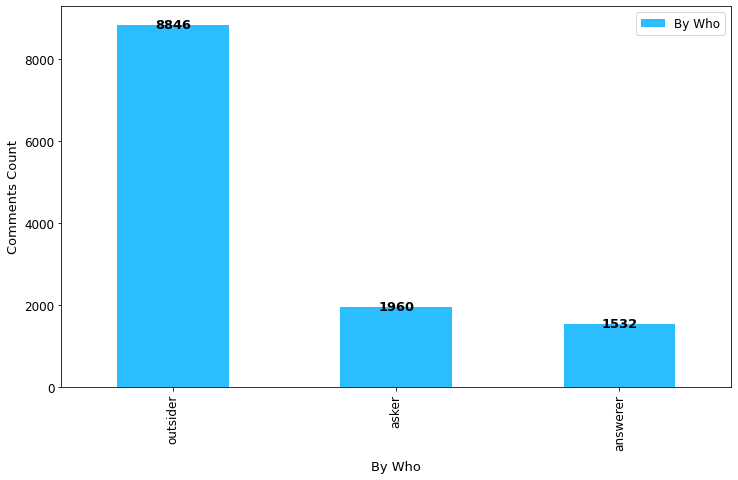

In [ ]:
who = df_rq4['ByWho'].value_counts()
DrawGraph(who, 'By Who', 'Comments Count', ['By Who'])

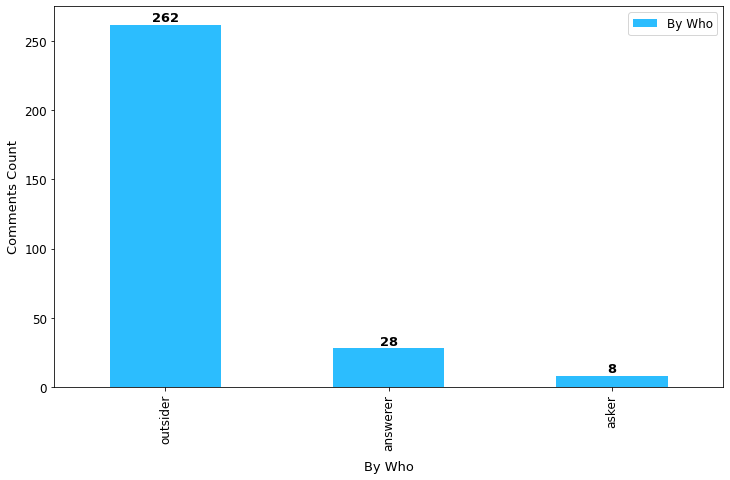

In [ ]:
who_final = df_final['ByWho'].value_counts()
DrawGraph(who_final, 'By Who', 'Comments Count', ['By Who'])

**Proportion of each type of evidence that users provide when pointing out obsolescence**

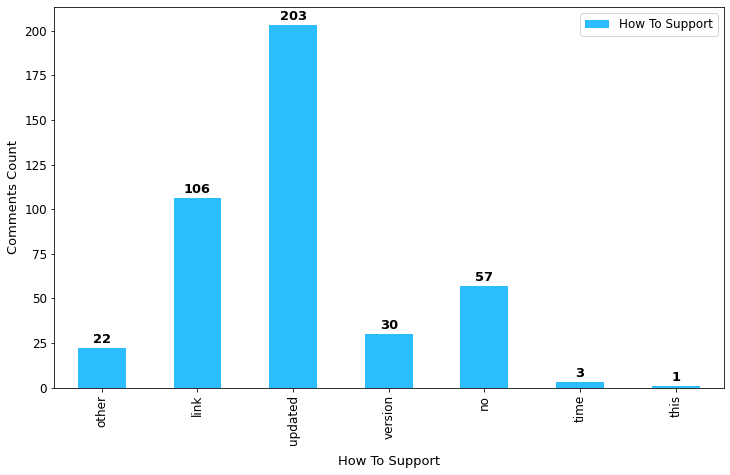

In [ ]:
hts = df_final['HowToSupport'].apply(lambda x: pd.value_counts(x.split("/"))).sum()
DrawGraph(hts, 'How To Support', 'Comments Count', ['How To Support'])

**Proportion of each type of evidence that different observers provide when pointing out the obsolescence of an answer**

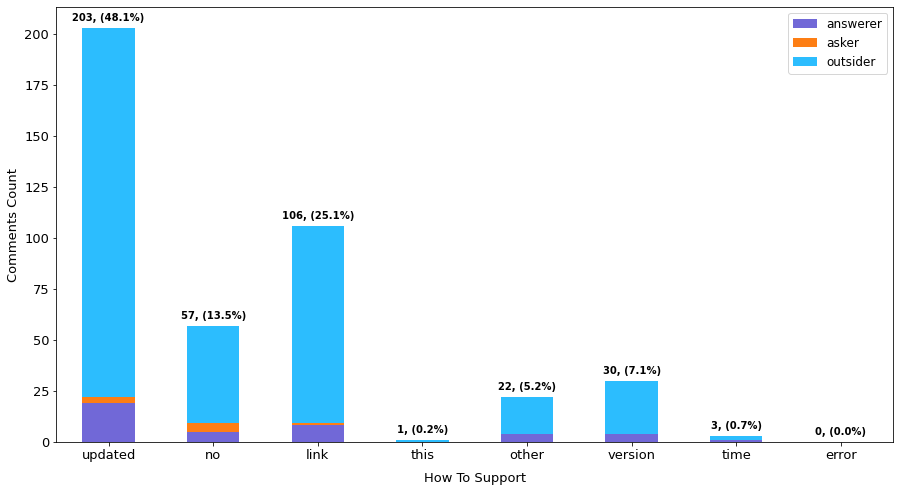

In [ ]:
#df_final_tmp = pd.read_excel('/content/drive/My Drive/Merged_Final.xlsx', usecols=['HowToSupport','ByWho']) # Zara Drive Path
df_final_tmp = pd.read_excel('/content/drive/MyDrive/Term1/Special Topics on Software Engineering/Project/Final Trimmed Dataset/Updated Latest Database/Merged_Final.xlsx', usecols = ['HowToSupport', 'ByWho']) # Manan Drive Path
df_3 = pd.DataFrame({'updated': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('updated')].ByWho.value_counts(),
				'no': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('no')].ByWho.value_counts(),
				'link': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('link')].ByWho.value_counts(),
				'this': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('this')].ByWho.value_counts(),
				'other': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('other')].ByWho.value_counts(),
				'version': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('version')].ByWho.value_counts(),
				'time': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('time')].ByWho.value_counts(),
				'error': df_final_tmp[df_final_tmp['HowToSupport'].str.contains('error')].ByWho.value_counts()
				}).fillna(0).T

DrawStackGraph(df_3, hts.sum(), 'How To Support', 'Comments Count')

**Number and percentage of each obsolescence reason based on manual analysis**

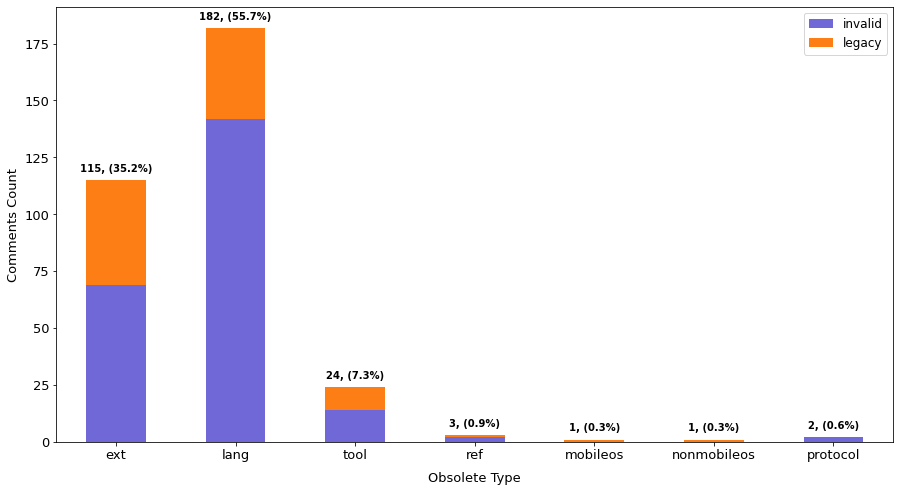

In [ ]:
#df_final_tmp = pd.read_excel('/content/drive/My Drive/Merged_Final.xlsx', usecols=['ObsoleteType','LegacyOrInvalid']) # Zara Drive Path
df_final_tmp = pd.read_excel('/content/drive/MyDrive/Term1/Special Topics on Software Engineering/Project/Final Trimmed Dataset/Updated Latest Database/Merged_Final.xlsx', usecols=['ObsoleteType','LegacyOrInvalid']) # Manan Drive Path
df_4 = pd.DataFrame({'ext': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('ext')].LegacyOrInvalid.value_counts(),
				'lang': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('lang')].LegacyOrInvalid.value_counts(),
				'tool': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('tool')].LegacyOrInvalid.value_counts(),
				'ref': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('ref')].LegacyOrInvalid.value_counts(),
				'mobileos': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('mobileos')].LegacyOrInvalid.value_counts(),
				'nonmobileos': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('nonmobileos')].LegacyOrInvalid.value_counts(),
				'protocol': df_final_tmp[df_final_tmp['ObsoleteType'].str.contains('protocol')].LegacyOrInvalid.value_counts()
				}).fillna(0).T

ot_sum = df_final['ObsoleteType'].apply(lambda x: pd.value_counts(x.split("/"))).sum(axis = 0).sum()
DrawStackGraph(df_4, ot_sum, 'Obsolete Type', 'Comments Count')

**How commenter describes obsolescence of an answer**

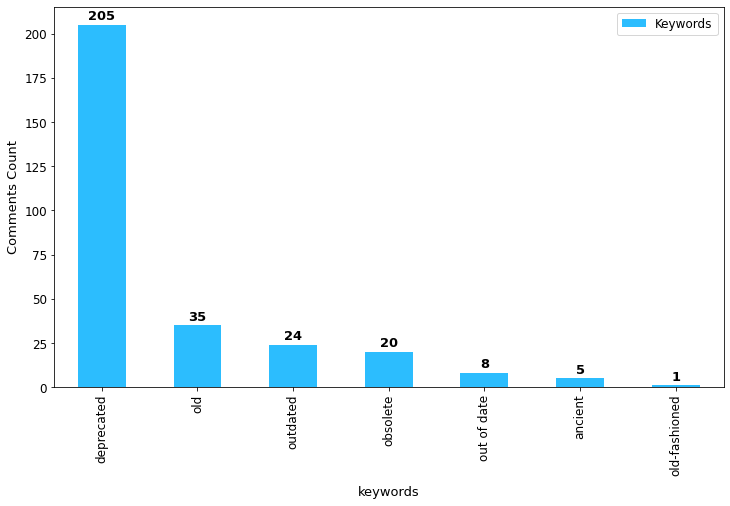

In [ ]:
keywords = df_final['Keywords'].value_counts()
DrawGraph(keywords, 'keywords', 'Comments Count', ['Keywords'])

**Number of obsolete questions according to tags**

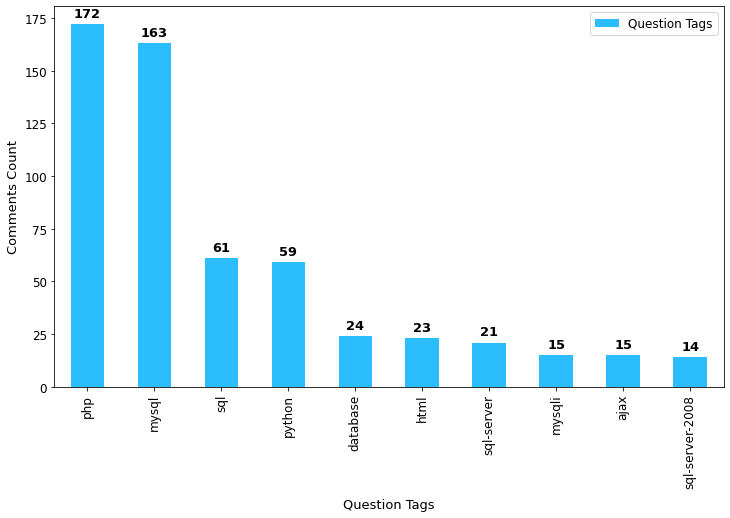

In [ ]:
li = df_final['QuestionTags'].apply(lambda x: pd.value_counts(x.split("|"))).sum(axis = 0).sort_values( ascending=False)[:10]
DrawGraph(li, 'Question Tags', 'Comments Count', ['Question Tags'])

**Data distribution based on True Positive and False Positive**


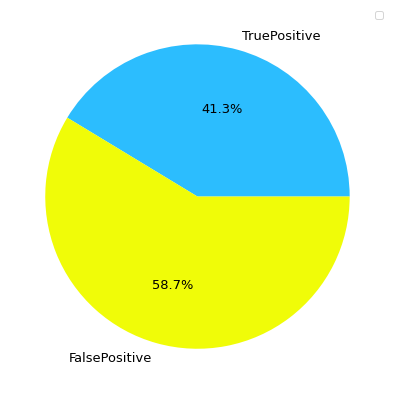

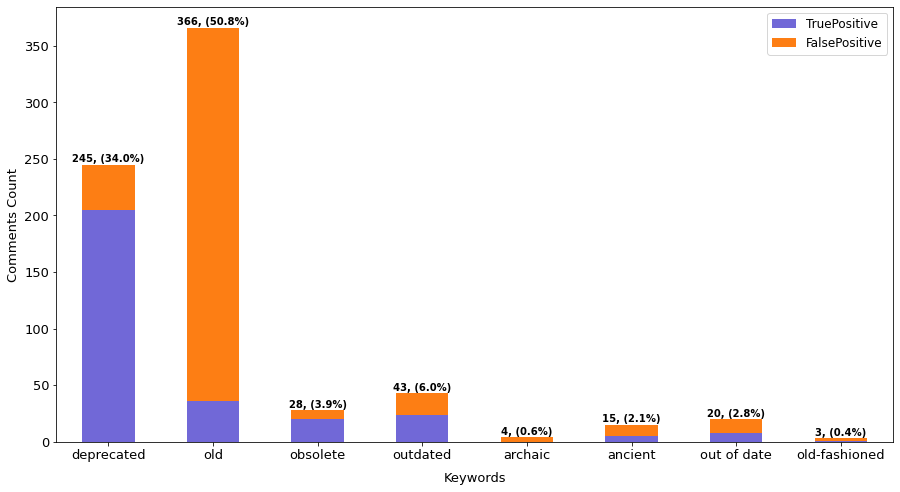

In [ ]:
def CreateKeywordsSeries(dataframe, keyword):
    df = dataframe[dataframe['Keywords'].str.contains(keyword)]
    return [df.ObsoleteType.count(), df.ObsoleteType.isna().sum()]

df_final_all = pd.read_excel('/content/drive/My Drive/Merged_Final_AllChecked.xlsx', usecols=['ByWho','Keywords', 'ObsoleteType']) # Zara Drive Path
# df_final_all = pd.read_excel('/content/drive/MyDrive/Term1/Special Topics on Software Engineering/Project/Final Trimmed Dataset/Updated Latest Database/Merged_Final_AllChecked.xlsx', usecols = ['Keywords','ObsoleteType']) # Manan Drive Path

df_tp_fp = pd.DataFrame({'CommentsCount': [df_final_all.ObsoleteType.count(), df_final_all.ObsoleteType.isna().sum()]}, 
                         index=['TruePositive', 'FalsePositive'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[Blue, Yellow])
df_tp_fp.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 7), fontsize=13)
plt.ylabel('')
plt.legend([])
plt.show()

df_7 = pd.DataFrame({'deprecated': CreateKeywordsSeries(df_final_all, 'deprecated'),
				'old': CreateKeywordsSeries(df_final_all, 'old'),
				'obsolete': CreateKeywordsSeries(df_final_all, 'obsolete'),
				'outdated': CreateKeywordsSeries(df_final_all, 'outdated'),
				'archaic': CreateKeywordsSeries(df_final_all, 'archaic'),
				'ancient': CreateKeywordsSeries(df_final_all, 'ancient'),
				'out of date': CreateKeywordsSeries(df_final_all, 'out of date'),
				'old-fashioned': CreateKeywordsSeries(df_final_all, 'old-fashioned'),
				}, index=['TruePositive', 'FalsePositive']).T
DrawStackGraph(df_7, df_final_all.Keywords.count(), 'Keywords', 'Comments Count')